In [7]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 495.8 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 9.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 14.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 47.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.0/313.0 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 59.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 20.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 15.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [61]:
import psycopg2
import json
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import seaborn as sns

print("imports")

imports


In [14]:
# Database connection details
db_user = "airflow"
db_password = "airflow"
db_host = "postgres"
db_port = "5432"
db_name = "airflow"


In [54]:
# Create a database engine
engine = create_engine(f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

# Query the stg_issues view
query = "SELECT * FROM stg_issues;"

# Load the data into a pandas DataFrame
issues = pd.read_sql_query(query, engine)



In [56]:
# List of specific request_type_titles
target_titles = [
    'Homeless Encampment and Requests for Outreach',
    'Someone Living on PUBLIC PROPERTY in Motor Home/Vehicle on Street',
    'Someone Living in Garage/Shed or Yard'
]

# Add a new column to denote if the request_type_title is in the list
issues['is_homeless_related'] = issues['request_type_title'].isin(target_titles)

# Display the updated DataFrame
print(issues[['request_type_title', 'is_homeless_related']].head())


                                  request_type_title  is_homeless_related
0                       Chicken or Poultry Complaint                False
1               City of Tacoma Owned Property Issues                False
2  Illegal Dumping, Garbage & Debris Request PUBL...                False
3  Illegal Dumping, Garbage & Debris Request PUBL...                False
4             Pothole / Street Repair or Maintenance                False


In [55]:
# 1. Basic Overview
stg_issues_df = issues
print("Shape of the DataFrame:", stg_issues_df.shape)
print("\nColumns and Data Types:\n", stg_issues_df.dtypes)
print("\nSample Rows:\n", stg_issues_df.head())

# 2. Descriptive Statistics for Numeric Columns
print("\nDescriptive Statistics:\n", stg_issues_df.describe())

# 3. Check for Missing Data
print("\nMissing Data:\n", stg_issues_df.isnull().sum())

# 4. Distribution of Issue Status
print("\nDistribution of Status:\n", stg_issues_df['status'].value_counts())

# 5. If there's a 'test_name' column, you can analyze it as well
if 'test_name' in stg_issues_df.columns:
    print("\nDistribution of Test Names:\n", stg_issues_df['test_name'].value_counts())


Shape of the DataFrame: (5843, 39)

Columns and Data Types:
 issue_id                                    int64
latitude                                  float64
longitude                                 float64
issue_url                                  object
media                                      object
point                                      object
votes                                      object
issue_rating                                int64
issue_status                               object
actions                                    object
issue_address                              object
issue_summary                              object
assignee                                   object
reporter                                   object
issue_created_at                   datetime64[ns]
issue_updated_at                   datetime64[ns]
issue_editable_until                       object
issue_last_edited_at                       object
issue_closed_at                    date

KeyError: 'status'

/tmp/ipykernel_106/382586905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stg_issues_df['issue_created_at'] = pd.to_datetime(stg_issues_df['issue_created_at'])
/tmp/ipykernel_106/382586905.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stg_issues_df['issue_closed_at'] = pd.to_datetime(stg_issues_df['issue_closed_at'], errors='coerce')  # Some may be null


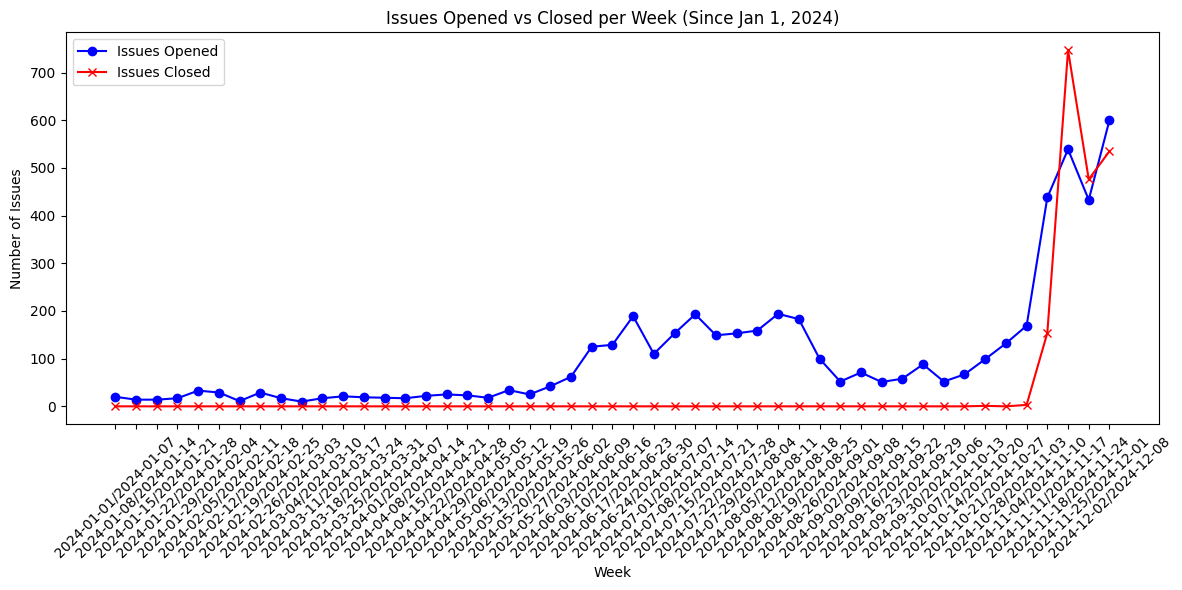

In [27]:
# Ensure 'issue_created_at' is in datetime format
issues['issue_created_at'] = pd.to_datetime(issues['issue_created_at'])

# Filter the DataFrame for issues created on or after '2024-01-01'
stg_issues_df = issues[issues['issue_created_at'] >= '2024-01-01']

# Ensure 'issue_created_at' and 'issue_closed_at' are in datetime format
stg_issues_df['issue_created_at'] = pd.to_datetime(stg_issues_df['issue_created_at'])
stg_issues_df['issue_closed_at'] = pd.to_datetime(stg_issues_df['issue_closed_at'], errors='coerce')  # Some may be null

# Filter data to include only issues opened or closed from January 1, 2024
start_date = '2024-01-01'
stg_issues_df = stg_issues_df[(stg_issues_df['issue_created_at'] >= start_date) | 
                               (stg_issues_df['issue_closed_at'] >= start_date)]

# Use .loc to avoid the SettingWithCopyWarning
stg_issues_df.loc[:, 'created_week'] = stg_issues_df['issue_created_at'].dt.to_period('W')
stg_issues_df.loc[:, 'closed_week'] = stg_issues_df['issue_closed_at'].dt.to_period('W')

# Count the number of issues opened and closed each week
opened_weekly = stg_issues_df.groupby('created_week').size()
closed_weekly = stg_issues_df.dropna(subset=['closed_week']).groupby('closed_week').size()

# Merge the data for plotting
weekly_data = pd.DataFrame({'opened': opened_weekly, 'closed': closed_weekly}).fillna(0)

# Plotting the chart
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index.astype(str), weekly_data['opened'], label='Issues Opened', color='b', marker='o')
plt.plot(weekly_data.index.astype(str), weekly_data['closed'], label='Issues Closed', color='r', marker='x')

plt.title('Issues Opened vs Closed per Week (Since Jan 1, 2024)')
plt.xlabel('Week')
plt.ylabel('Number of Issues')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

         date  open_issues_count
0  2024-10-01               2617
1  2024-10-02               2622
2  2024-10-03               2646
3  2024-10-04               2661
4  2024-10-05               2668
..        ...                ...
63 2024-12-03               3307
64 2024-12-04               3267
65 2024-12-05               3307
66 2024-12-06               3341
67 2024-12-07               3258

[68 rows x 2 columns]


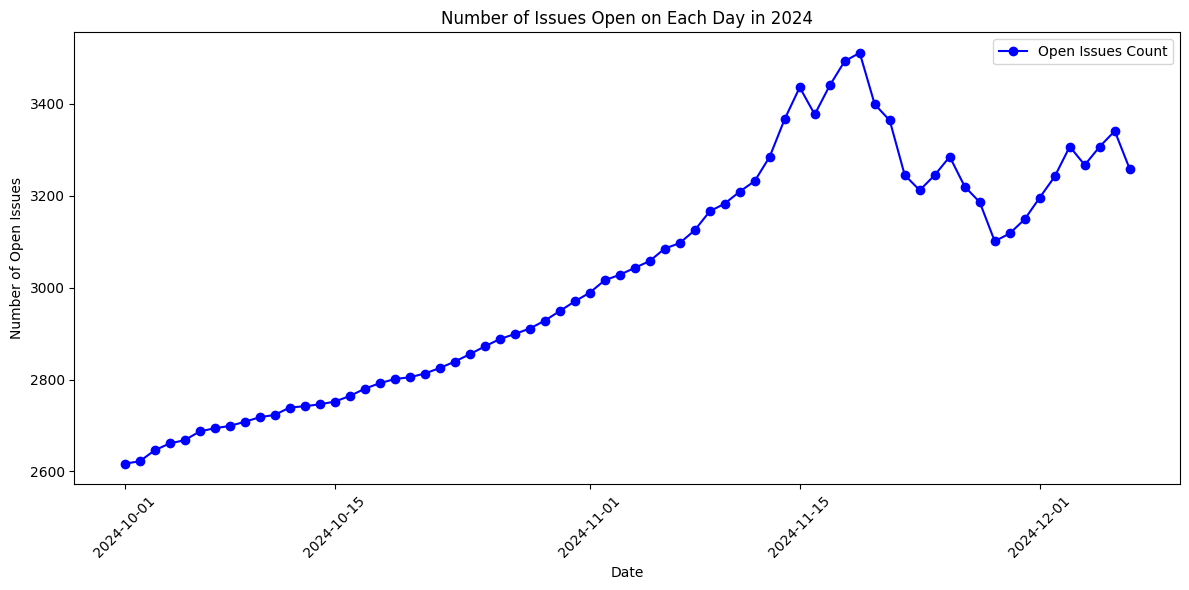

In [36]:
stg_issues_df = issues
# Ensure 'issue_created_at' and 'issue_closed_at' are in datetime format
stg_issues_df['issue_created_at'] = pd.to_datetime(stg_issues_df['issue_created_at'])
stg_issues_df['issue_closed_at'] = pd.to_datetime(stg_issues_df['issue_closed_at'], errors='coerce')

# Filter for issues created in 2024
stg_issues_df = stg_issues_df[stg_issues_df['issue_created_at'].dt.year == 2024]

# Create a date range for every day in 2024
date_range = pd.date_range(start='2024-10-01', end='2024-12-07', freq='D')

# Initialize a list to store the count of open issues per day
open_issues_per_day = []

# For each day in the 2024 date range
for date in date_range:
    # Count issues where created_at <= date and (closed_at >= date or is NaT if still open)
    open_issues = stg_issues_df[
        (stg_issues_df['issue_created_at'] <= date) & 
        ((stg_issues_df['issue_closed_at'].isna()) | (stg_issues_df['issue_closed_at'] >= date))
    ]
    
    # Append the count of open issues to the list
    open_issues_per_day.append(len(open_issues))

# Create a DataFrame with the date range and the corresponding open issues count
daily_open_issues_df = pd.DataFrame({
    'date': date_range,
    'open_issues_count': open_issues_per_day
})

# Display the first few rows to confirm
daily_open_issues_df.head()

print(daily_open_issues_df)
# Plotting the chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_open_issues_df['date'], daily_open_issues_df['open_issues_count'], label='Open Issues Count', color='b', marker='o')

plt.title('Number of Issues Open on Each Day in 2024')
plt.xlabel('Date')
plt.ylabel('Number of Open Issues')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [40]:

# Create a base map centered around the average latitude and longitude
map_center = [stg_issues_df['latitude'].mean(), stg_issues_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Filter out rows with missing latitude or longitude
heat_data = stg_issues_df.dropna(subset=['latitude', 'longitude'])

# Prepare the data for the heatmap: a list of [latitude, longitude] pairs
heat_data_list = heat_data[['latitude', 'longitude']].values.tolist()

# Add a heatmap layer
HeatMap(heat_data_list).add_to(m)

# Display the map (in a Jupyter Notebook, the map will render interactively)
m


In [ ]:
cursor.close()
connection.close()

In [67]:
# Filter for the rows where is_homeless_related is True
homeless_related_df = issues[issues['is_homeless_related'] == True]

# Create a base map centered around the average latitude and longitude
map_center = [homeless_related_df['latitude'].mean(), homeless_related_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Filter out rows with missing latitude or longitude
heat_data = homeless_related_df.dropna(subset=['latitude', 'longitude'])

# Prepare the data for the heatmap: a list of [latitude, longitude] pairs
heat_data_list = heat_data[['latitude', 'longitude']].values.tolist()

# Add a heatmap layer
HeatMap(heat_data_list).add_to(m)

# Display the map (in a Jupyter Notebook, the map will render interactively)
m


In [57]:
unique_statuses = issues['is_homeless_related'].unique()
print(unique_statuses)

[False  True]
